# Analisis de arboles en la Ciudad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import math

In [59]:
comunas = gpd.read_file('./Data/comunas.csv')

# Convert Comuna Code into INT type
comunas.loc[: , 'COMUNAS'] = comunas.loc[:, 'COMUNAS'].astype(float).astype(int)

# Sort by comuna number
comunas = comunas.sort_values('COMUNAS')
comunas.head()

C:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,geometry
14,MULTIPOLYGON (((-58.3685405568825 -34.57365006...,14,LIMITE COMUNAL,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,36102.20157280000,17794568.87900000066,"MULTIPOLYGON (((-58.36854 -34.57365, -58.36852..."
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,1,LIMITE COMUNAL,2,RECOLETA,21452.83864780000,6317264.56099000107,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
11,MULTIPOLYGON (((-58.4119188098038 -34.59800307...,10,LIMITE COMUNAL,3,BALVANERA - SAN CRISTOBAL,10486.26080920000,6385991.39577999990,"MULTIPOLYGON (((-58.41192 -34.59800, -58.41029..."
8,MULTIPOLYGON (((-58.3886402930729 -34.63373121...,13,LIMITE COMUNAL,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,35423.28279860000,21684644.62660000101,"MULTIPOLYGON (((-58.38864 -34.63373, -58.38864..."
9,MULTIPOLYGON (((-58.4333340897605 -34.60267345...,2,LIMITE COMUNAL,5,ALMAGRO - BOEDO,12323.43247920000,6660603.11937000044,"MULTIPOLYGON (((-58.43333 -34.60267, -58.43314..."


C:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


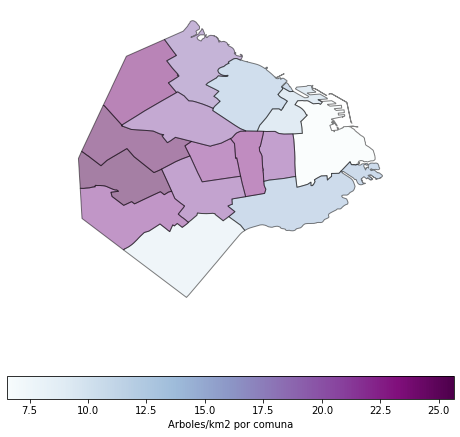

In [58]:
arboles_2018 = pd.read_csv('./Data/arbolado-publico-lineal-2017-2018.csv')
arboles_2018 = arboles_2018.dropna(subset=['long', 'lat'])
arboles_2018

arboles_por_comuna = []

# Add to the list arboles_por_comuna the amount of trees of each comuna in ORDER.
# and divide them by the area of the comuna.
# NOTE: The area is divided by 10.000 because I suppose it's expressed in m2,
# so I convert it to km2.
for i in range(1, 16):
    area_comuna = int(float(comunas.iloc[i-1, 6])) / 10000
    total_trees = len(arboles_2018.loc[arboles_2018.comuna == i, :])
    arboles_por_km2 = total_trees / area_comuna
    arboles_por_comuna.append(arboles_por_km2)

# Add arboles to the dataframe
comunas['arboles'] = arboles_por_comuna

# Plot the map
mapa = comunas.plot(
    figsize=(8,8), 
    column='arboles', 
    cmap='BuPu', 
    edgecolor='k', 
    alpha=0.5,
    legend=True,
    legend_kwds={'label': "Arboles/km2 por comuna",'orientation': "horizontal"}
)
mapa.set_axis_off()

C:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


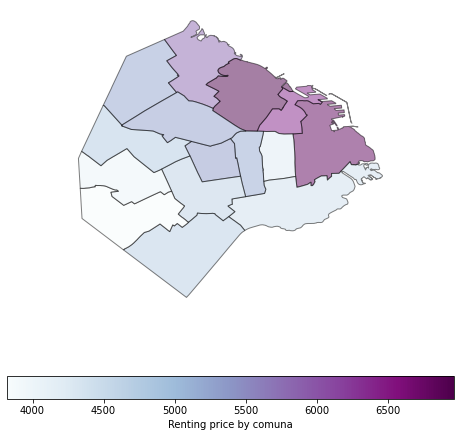

In [65]:
# Read file, convert comuna column type and sort by its value
comunas_precio = gpd.read_file('./Data/comunas.csv')
comunas_precio.loc[: , 'COMUNAS'] = comunas_precio.loc[:, 'COMUNAS'].astype(float).astype(int)
comunas_precio = comunas_precio.sort_values('COMUNAS')


# Read file of renting prices, drop Na and select the ones in the year 2015 (there are less Na, but it can be changed)
precio_alquiler = pd.read_csv('./Data/precio-alquiler-deptos.csv')
precio_alquiler = precio_alquiler.dropna(subset=['precio_prom'])
precio_alquiler = precio_alquiler.loc[precio_alquiler['anio'] == 2015, :]


# Calculate the average price per m2 for renting on each comuna and add it to the dataframe.
precio_por_comuna = []

for i in range(1, 16):
    lista_precios = precio_alquiler.loc[precio_alquiler['comuna'] == i, :]
    prom = sum(lista_precios.loc[:, 'precio_prom'])/len(lista_precios)
    precio_por_comuna.append(prom)
comunas_precio['precio'] = precio_por_comuna


# Plot the map
comunas_precio.plot(
    figsize=(8,8), 
    column='precio', 
    cmap='BuPu', 
    edgecolor='k', 
    alpha=0.5,
    legend=True,
    legend_kwds={'label': "Renting price by comuna",'orientation': "horizontal"}
).set_axis_off()


Visualize if there is any correlation or relation between the trees/km2 and the renting price.

At a first sight, it seems like there's no correlation between the two variables: 

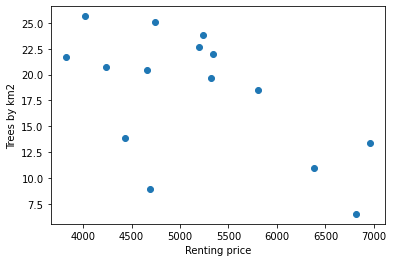

In [69]:
plt.scatter(precio_por_comuna, arboles_por_comuna)
plt.xlabel('Renting price')
plt.ylabel('Trees by km2')
plt.show()

TODO: 

* Find out if the population density influences on something.
* Check out the space where the trees are
* Check other properties about the trees, such as the size, species, etc.
* Check if the selling prices change something
* Check renting prices by neighborhood
* asdasd

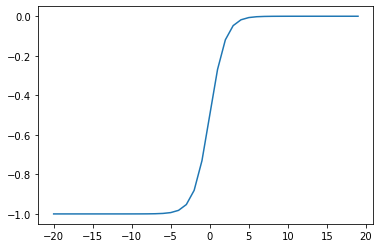

In [7]:
x = [x for x in range(-20, 20)]
y = [-1/(1 + math.e**x) for x in range(-20, 20)]

plt.plot(x, y)